<a href="https://colab.research.google.com/github/abhishek-kr27/Python-Project/blob/main/Banking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

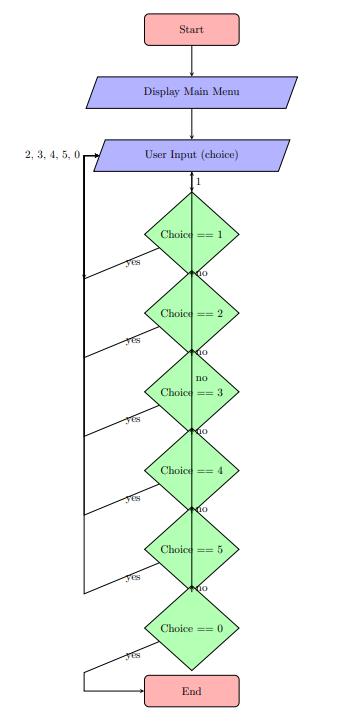

Imagine you have a simple banking system where you can create accounts, deposit money, withdraw money, check your balance, and see your transaction history. This code is like a computerized version of that system.

1. **Creating an Account:**
   - You can create a new account by providing a unique ID, your name, and an initial amount of money. The system remembers this information.

2. **Depositing Money:**
   - You can add money to your account by specifying how much you want to deposit. The system keeps track of your new balance and records the deposit.

3. **Withdrawing Money:**
   - If you need to take money out, you can do that too. Just tell the system how much you want to withdraw, and it checks if you have enough money. If everything is okay, it updates your balance and records the withdrawal.

4. **Checking Balance:**
   - You can always check how much money you have in your account. The system tells you your current balance.

5. **Transaction History:**
   - The system keeps a history of your transactions. So, you can see a list of all the deposits and withdrawals you've made.

6. **Exiting the System:**
   - When you're done, you can choose to exit the system, and it says goodbye.

**Technical Explanation:**

Now, let's dive a bit deeper into how the code achieves this:

- **Data Storage:**
  - It uses a dictionary (`accounts`) to store information about each account. Each account has details like account holder name, balance, transactions, account type, allowed transactions, and account information.

- **Functions:**
  - Functions like `create_account`, `deposit`, `withdraw`, `get_balance`, and `get_transaction_history` perform specific tasks related to the banking operations. They interact with the account data stored in the dictionary.

- **User Interaction:**
  - The `interactive_banking_system` function runs a loop where the user is presented with a menu of options (create account, deposit, withdraw, check balance, transaction history, exit). The user's choice determines which function is called.

- **Input and Output:**
  - The code uses `input` statements to get information from the user (like account ID, amount, etc.) and `print` statements to display information to the user.

- **Control Flow:**
  - The code uses conditional statements (`if`, `elif`, `else`) to determine what action to take based on the user's choice.

- **Loops:**
  - The system runs in a loop until the user chooses to exit, allowing them to perform multiple operations without restarting the program.

- **Error Handling:**
  - The code checks for certain conditions (e.g., existing account ID, valid withdrawal amount) and provides appropriate feedback to the user.

This code essentially simulates a basic banking system by organizing data and providing functionalities through a user-friendly interface.

In [ ]:
import pandas as pd

csv_file_path = "accounts_data.csv"
accounts = {}
def save_accounts_to_csv(accounts_data):
    df = pd.DataFrame.from_dict(accounts_data, orient='index')
    df.to_csv(csv_file_path, index_label='account_id')

def create_account(account_id, account_holder, initial_balance=0.0):
    if account_id not in accounts:
        accounts[account_id] = {
            'account_holder': account_holder,
            'balance': initial_balance,
            'transactions': [],
            'account_type': 'savings',
            'allowed_transactions': {'deposit', 'withdrawal'},
            'account_info': (account_holder, account_id),
        }
        return True
    else:
        return False

def deposit(account_id, amount):
    if account_id in accounts and amount > 0 and 'deposit' in accounts[account_id]['allowed_transactions']:
        accounts[account_id]['balance'] += amount
        accounts[account_id]['transactions'].append(('deposit', amount))
        return True
    else:
        return False

def withdraw(account_id, amount):
    if account_id in accounts and 0 < amount <= accounts[account_id]['balance'] and 'withdrawal' in accounts[account_id]['allowed_transactions']:
        accounts[account_id]['balance'] -= amount
        accounts[account_id]['transactions'].append(('withdrawal', amount))
        return True
    else:
        return False



def get_balance(account_id):
    return accounts.get(account_id, {}).get('balance', None)

def get_transaction_history(account_id):
    return accounts.get(account_id, {}).get('transactions', [])

def interactive_banking_system():

    while True:
        print("\n=== Interactive Banking System ===")
        print("1. Create Account")
        print("2. Deposit")
        print("3. Withdraw")
        print("4. Check Balance")
        print("5. Transaction History")
        print("0. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            account_id = input("Enter account ID: ")
            account_holder = input("Enter account holder's name: ")
            try:
                initial_balance = float(input("Enter initial balance: "))
            except ValueError:
                print("Invalid input. Please enter a valid numeric value for the initial balance.")
                continue

            if create_account(account_id, account_holder, initial_balance):
                print("Account created successfully!")
            else:
                print("Account ID already exists. Try again.")

        elif choice == '2':
            account_id = input("Enter account ID: ")
            try:
                amount = float(input("Enter deposit amount: "))
            except ValueError:
                print("Invalid input. Please enter a valid numeric value for the deposit amount.")
                continue

            if deposit(account_id, amount):
                print("Deposit successful!")
            else:
                print("Invalid account ID or amount. Try again.")

        elif choice == '3':
            account_id = input("Enter account ID: ")
            try:
                amount = float(input("Enter withdrawal amount: "))
            except ValueError:
                print("Invalid input. Please enter a valid numeric value for the withdrawal amount.")
                continue

            if withdraw(account_id, amount):
                print("Withdrawal successful!")
            else:
                print("Invalid account ID, amount, or withdrawal not allowed. Try again.")

        elif choice == '4':
            account_id = input("Enter account ID: ")
            balance = get_balance(account_id)
            if balance is not None:
                print(f"Current balance: {balance}")
            else:
                print("Invalid account ID. Try again.")

        elif choice == '5':
            account_id = input("Enter account ID: ")
            transaction_history = get_transaction_history(account_id)
            if transaction_history:
                print("Transaction History:")
                for transaction in transaction_history:
                    print(f"{transaction[0].capitalize()}: {transaction[1]}")
            else:
                print("No transactions for this account.")

        elif choice == '0':
            # Save accounts data to CSV file before exiting
            save_accounts_to_csv(accounts)
            print("Exiting the Interactive Banking System. Goodbye!")
            break

        else:
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    interactive_banking_system()


=== Interactive Banking System ===
1. Create Account
2. Deposit
3. Withdraw
4. Check Balance
5. Transaction History
0. Exit
Enter your choice: 1
Enter account ID: 2719
Enter account holder's name: ABHISHEK
Enter initial balance: 1000
Account created successfully!

=== Interactive Banking System ===
1. Create Account
2. Deposit
3. Withdraw
4. Check Balance
5. Transaction History
0. Exit
Enter your choice: 2
Enter account ID: 2719
Enter deposit amount: 10000
Deposit successful!

=== Interactive Banking System ===
1. Create Account
2. Deposit
3. Withdraw
4. Check Balance
5. Transaction History
0. Exit
Enter your choice: 3
Enter account ID: 2719
Enter withdrawal amount: 5000
Withdrawal successful!

=== Interactive Banking System ===
1. Create Account
2. Deposit
3. Withdraw
4. Check Balance
5. Transaction History
0. Exit
Enter your choice: 4
Enter account ID: 2719
Current balance: 6000.0

=== Interactive Banking System ===
1. Create Account
2. Deposit
3. Withdraw
4. Check Balance
5. Transa